In [10]:
# Loading the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')
%matplotlib inline

In [5]:
# Loading Data

df = pd.read_csv("../data/raw/CC GENERAL.csv")
df_clean = df.copy()

In [6]:
# Dropping CUST_ID column as it is not required

df_clean.drop('CUST_ID', axis=1, inplace=True)

In [11]:
# Imputing with median to missing values 

df_clean['CREDIT_LIMIT'].fillna(df_clean['CREDIT_LIMIT'].median(), inplace=True)
df_clean['MINIMUM_PAYMENTS'].fillna(df_clean['MINIMUM_PAYMENTS'].median(), inplace=True)

In [ ]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Convert back to DataFrame for ease

df_scaled = pd.DataFrame(df_scaled, columns=df_clean.columns)

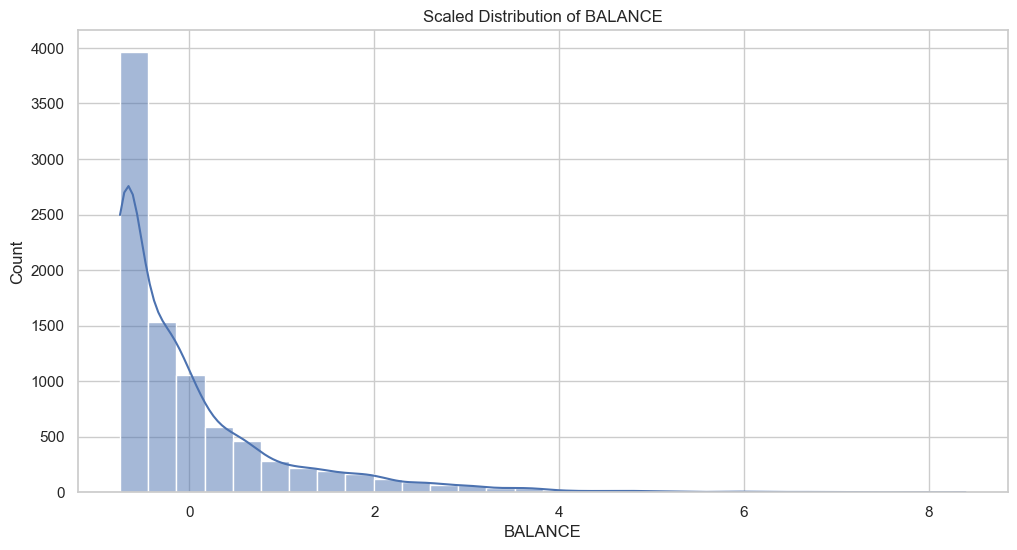

In [14]:
# Check scaled data distributions

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(df_scaled['BALANCE'], kde=True, bins=30)
plt.title('Scaled Distribution of BALANCE')
plt.show()


In [17]:
# Saving the data 

df_scaled.to_csv('../data/processed/cc_scaled.csv', index=False)
